# 提供银行精准营销解决方案

In [130]:
import warnings
warnings.filterwarnings('ignore')

In [672]:
# 加载数据
import pandas as pd
import os

BANK_PATH = 'dataset'
def load_data(bank_path=BANK_PATH):
    csv_path=os.path.join(bank_path, "train_set.csv")
    return pd.read_csv(csv_path)
bank_data = load_data()
bank_data.drop(['ID'],inplace=True,axis=1)
bank_data


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,43,management,married,tertiary,no,291,yes,no,unknown,9,may,150,2,-1,0,unknown,0
1,42,technician,divorced,primary,no,5076,yes,no,cellular,7,apr,99,1,251,2,other,0
2,47,admin.,married,secondary,no,104,yes,yes,cellular,14,jul,77,2,-1,0,unknown,0
3,28,management,single,secondary,no,-994,yes,yes,cellular,18,jul,174,2,-1,0,unknown,0
4,42,technician,divorced,secondary,no,2974,yes,no,unknown,21,may,187,5,-1,0,unknown,0
5,56,services,divorced,secondary,no,450,no,no,unknown,9,jun,47,1,-1,0,unknown,0
6,32,management,single,tertiary,no,1716,no,no,cellular,21,nov,157,4,-1,0,unknown,0
7,33,management,single,tertiary,no,-359,no,no,telephone,29,aug,59,2,-1,0,unknown,0
8,32,technician,single,secondary,no,309,yes,yes,cellular,25,aug,99,3,-1,0,unknown,0
9,55,management,married,tertiary,no,4777,no,yes,unknown,20,jun,12,3,-1,0,unknown,0


In [298]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [93]:
# info() 方法可以快速查看数据的描述，特别是总行数、每个属性的类型和非空值的数量
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25317 entries, 0 to 25316
Data columns (total 17 columns):
age          25317 non-null int64
job          25317 non-null object
marital      25317 non-null object
education    25317 non-null object
default      25317 non-null object
balance      25317 non-null int64
housing      25317 non-null object
loan         25317 non-null object
contact      25317 non-null object
day          25317 non-null int64
month        25317 non-null object
duration     25317 non-null int64
campaign     25317 non-null int64
pdays        25317 non-null int64
previous     25317 non-null int64
poutcome     25317 non-null object
y            25317 non-null int64
dtypes: int64(8), object(9)
memory usage: 3.3+ MB


In [94]:
# 查看标签比例
bank_data["y"].value_counts()

0    22356
1     2961
Name: y, dtype: int64

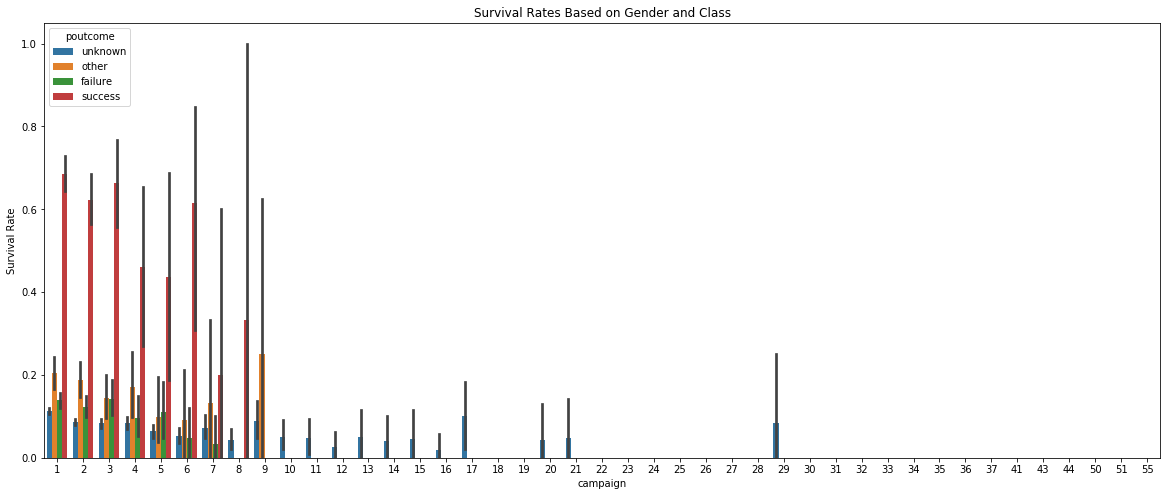

In [612]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.barplot(x="campaign", y="y", hue="poutcome", data=bank_data,ax=ax)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")
plt.show()

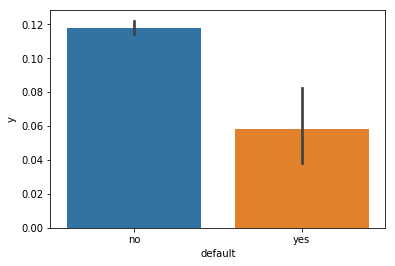

In [415]:
sns.barplot(x="default", y="y", data=bank_data)
plt.show()

In [428]:
# 工作类型分类
bank_data["job"].value_counts()

blue-collar      5456
management       5296
technician       4241
admin.           2909
services         2342
retired          1273
self-employed     884
entrepreneur      856
unemployed        701
housemaid         663
student           533
unknown           163
Name: job, dtype: int64

In [19]:
# 婚姻状态
bank_data["marital"].value_counts()

married     15245
single       7157
divorced     2915
Name: marital, dtype: int64

In [432]:

bank_data["balance"].value_counts()
# bank_data.loc[bank_data["education"] == 'secondary',"education" ].count()

 0        1936
 1         121
 4          82
 2          81
 3          72
 5          66
 6          52
 8          45
 23         42
 7          40
 47         37
 10         37
 94         37
 25         37
 223        36
 18         36
 91         35
 33         34
 49         34
 12         34
 20         34
 105        34
 79         34
 21         33
 61         33
 11         33
 35         33
 50         33
 19         32
 96         32
          ... 
 6036        1
 10114       1
 3959        1
 1910        1
 1894        1
 7982        1
 3868        1
 1709        1
 2214        1
 4341        1
 6388        1
-2282        1
 5807        1
 4325        1
 4309        1
 8403        1
 4293        1
 5839        1
 3820        1
 20541       1
 2182        1
 7934        1
 12401       1
 2150        1
 8291        1
 14107       1
 6212        1
 8259        1
 43074       1
 2407        1
Name: balance, Length: 5736, dtype: int64

In [389]:
# 是否有违约记录
bank_data["default"].value_counts()

no     24869
yes      448
Name: default, dtype: int64

In [11]:
# 是否有个人贷款
bank_data["loan"].value_counts()

no     21258
yes     4059
Name: loan, dtype: int64

In [12]:
# 是否有住房贷款
bank_data["housing"].value_counts()

yes    14020
no     11297
Name: housing, dtype: int64

In [13]:
# 与客户联系的沟通方式
bank_data["contact"].value_counts()

cellular     16391
unknown       7281
telephone     1645
Name: contact, dtype: int64

In [350]:
# 上一次活动的结果
bank_data["poutcome"].value_counts()

unknown    20677
failure     2735
other       1070
success      835
Name: poutcome, dtype: int64

In [96]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000
mean,40.935379,1357.555082,15.835289,257.732393,2.772050,40.248766,0.591737,0.116957
std,10.634289,2999.822811,8.319480,256.975151,3.136097,100.213541,2.568313,0.321375
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,73.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,181.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1435.000000,21.000000,317.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,3881.000000,55.000000,854.000000,275.000000,1.000000


In [574]:
#  训练集拆分

import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=41)
for train_index, test_index in split.split(bank_data, bank_data["y"]):
    strat_train_set=bank_data.loc[train_index]
    strat_test_set=bank_data.loc[test_index]
new_bank_data = strat_train_set.copy()
bank_set=new_bank_data.iloc[:,new_bank_data.columns!='y']
bank_labels=new_bank_data.iloc[:,new_bank_data.columns=='y']
bank_set.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
1746,40,entrepreneur,married,secondary,no,285,no,no,cellular,18,may,261,1,178,1,failure
1181,54,self-employed,married,tertiary,no,0,yes,no,cellular,20,aug,83,5,-1,0,unknown
18258,42,technician,married,secondary,no,682,yes,no,cellular,14,jul,285,2,-1,0,unknown
6925,32,blue-collar,single,secondary,no,2597,yes,no,cellular,15,may,233,1,368,1,failure
23275,57,retired,married,secondary,no,1044,no,no,telephone,11,jan,585,1,192,2,success


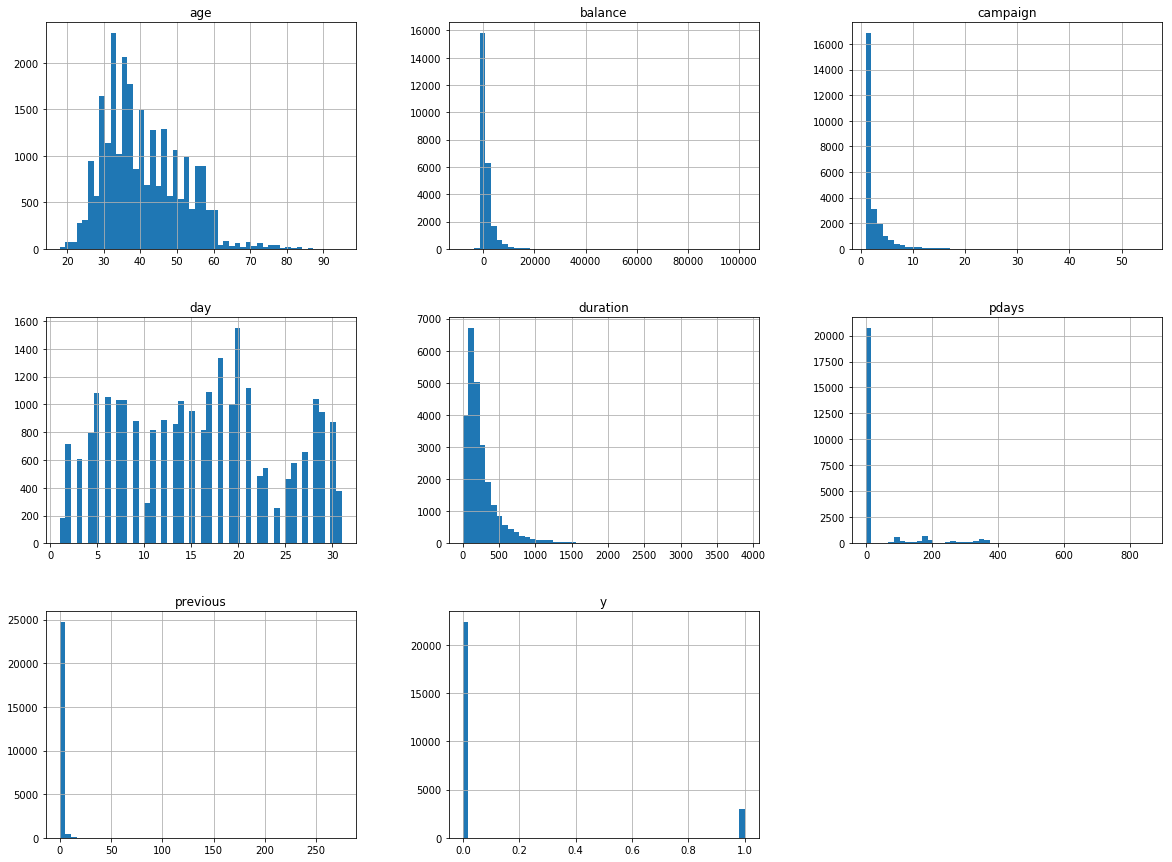

In [81]:
# 观察每个数值属性的柱状图
import matplotlib.pyplot as plt
bank_data.hist(bins=50, figsize=(20,15))
plt.show()

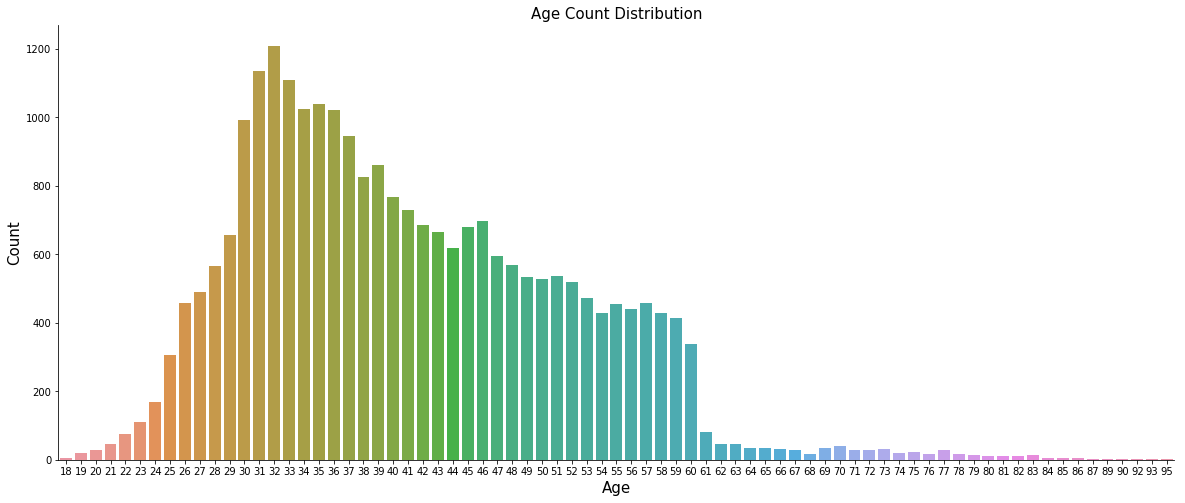

In [285]:
# 年龄
import seaborn as sns

fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = bank_set)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()
plt.show()

In [286]:
print('第一四分位数: ', bank_set['age'].quantile(q = 0.25))
print('第二四分位数: ', bank_set['age'].quantile(q = 0.50))
print('第三四分位数: ', bank_set['age'].quantile(q = 0.75))
print('第四四分位数: ', bank_set['age'].quantile(q = 1.00))
print('age > ', bank_set['age'].quantile(q = 0.75) + 
                      1.5*(bank_set['age'].quantile(q = 0.75) - bank_set['age'].quantile(q = 0.25)), '属于异常值')


第一四分位数:  33.0
第二四分位数:  39.0
第三四分位数:  48.0
第四四分位数:  95.0
age >  70.5 属于异常值


In [7]:
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 33, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 33) & (dataframe['age'] <= 48), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 48) & (dataframe['age'] <= 71), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 71) & (dataframe['age'] <= 95), 'age'] = 4
    return dataframe
age(bank_set)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
1746,2,entrepreneur,married,secondary,no,285,no,no,cellular,18,may,261,1,178,1,failure
1181,3,self-employed,married,tertiary,no,0,yes,no,cellular,20,aug,83,5,-1,0,unknown
18258,2,technician,married,secondary,no,682,yes,no,cellular,14,jul,285,2,-1,0,unknown
6925,1,blue-collar,single,secondary,no,2597,yes,no,cellular,15,may,233,1,368,1,failure
23275,3,retired,married,secondary,no,1044,no,no,telephone,11,jan,585,1,192,2,success
4288,1,services,divorced,secondary,no,62,yes,no,cellular,12,may,56,3,351,3,other
20479,2,technician,single,unknown,no,1077,yes,no,telephone,31,jul,6,2,-1,0,unknown
4944,1,housemaid,married,secondary,no,826,yes,no,cellular,11,may,256,1,-1,0,unknown
22060,2,admin.,single,secondary,no,206,yes,no,cellular,30,apr,144,2,-1,0,unknown
376,1,admin.,married,secondary,no,396,yes,no,unknown,30,may,205,2,-1,0,unknown


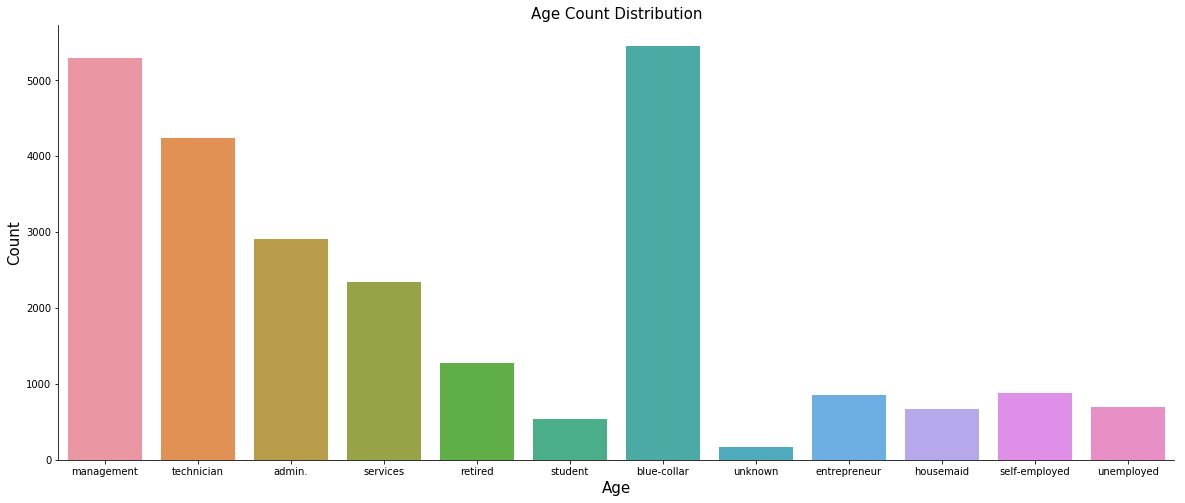

In [486]:

fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data = bank_data)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()
plt.show()

In [76]:
# 分类值处理

from sklearn.preprocessing import OrdinalEncoder
bank_cat = bank_set[['job', 'marital','education', 'default', 'housing', 'loan', 'contact', 'poutcome', 'month']]
ordinal_encoder = OrdinalEncoder()
cat_encoded = ordinal_encoder.fit_transform(bank_cat)
cat_encoded


array([[4., 1., 2., ..., 2., 3., 8.],
       [9., 0., 0., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 3., 5.],
       ...,
       [1., 0., 0., ..., 2., 3., 8.],
       [2., 0., 2., ..., 0., 3., 9.],
       [4., 1., 2., ..., 0., 3., 9.]])

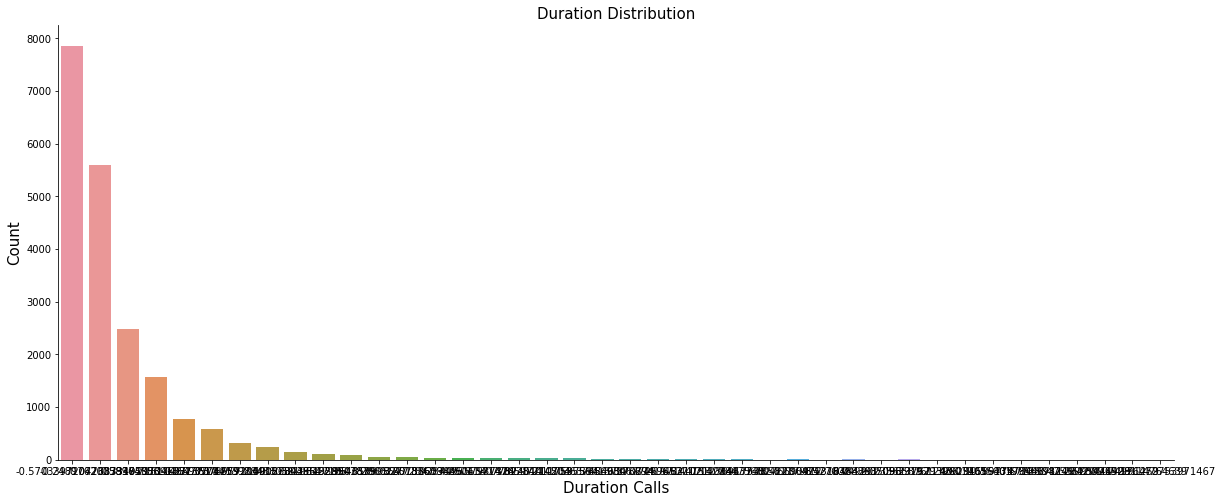

In [631]:
# 联系时长
import seaborn as sns

fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(bank_set['campaign'])
ax.set_xlabel('Duration Calls', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Duration Distribution', fontsize=15)
sns.despine()
plt.show()


Int64Index([    0,     2,     3,     4,     5,     6,     7,     8,     9,
               10,
            ...
            25303, 25304, 25305, 25306, 25307, 25308, 25310, 25314, 25315,
            25316],
           dtype='int64', length=20674)


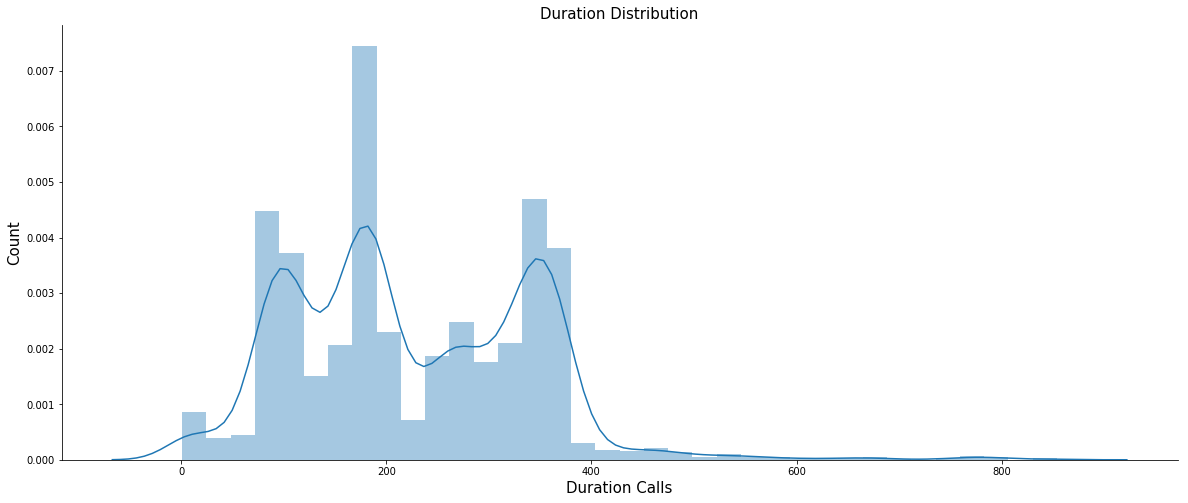

In [499]:

import seaborn as sns

fig, ax = plt.subplots()
fig.set_size_inches(20, 8)

bank_data.loc[bank_data['pdays'] == -1, 'pdays'] = 0
indexs = bank_data.loc[bank_data['pdays'] == 0, 'pdays'].index
print(indexs)
bank_data.drop(indexs,inplace=True)

sns.distplot(bank_data['pdays'])
ax.set_xlabel('Duration Calls', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Duration Distribution', fontsize=15)
sns.despine()
plt.show()

In [500]:
print('第一四分位数: ', bank_data['pdays'].quantile(q = 0.25))
print('第二四分位数: ', bank_data['pdays'].quantile(q = 0.50))
print('第三四分位数: ', bank_data['pdays'].quantile(q = 0.75))
print('第四四分位数: ', bank_data['pdays'].quantile(q = 1.00))
print('duration > ', bank_data['pdays'].quantile(q = 0.75) + 
                      1.5*(bank_data['pdays'].quantile(q = 0.75) - bank_data['pdays'].quantile(q = 0.25)), '属于异常值')

第一四分位数:  129.0
第二四分位数:  191.0
第三四分位数:  329.0
第四四分位数:  854.0
duration >  629.0 属于异常值


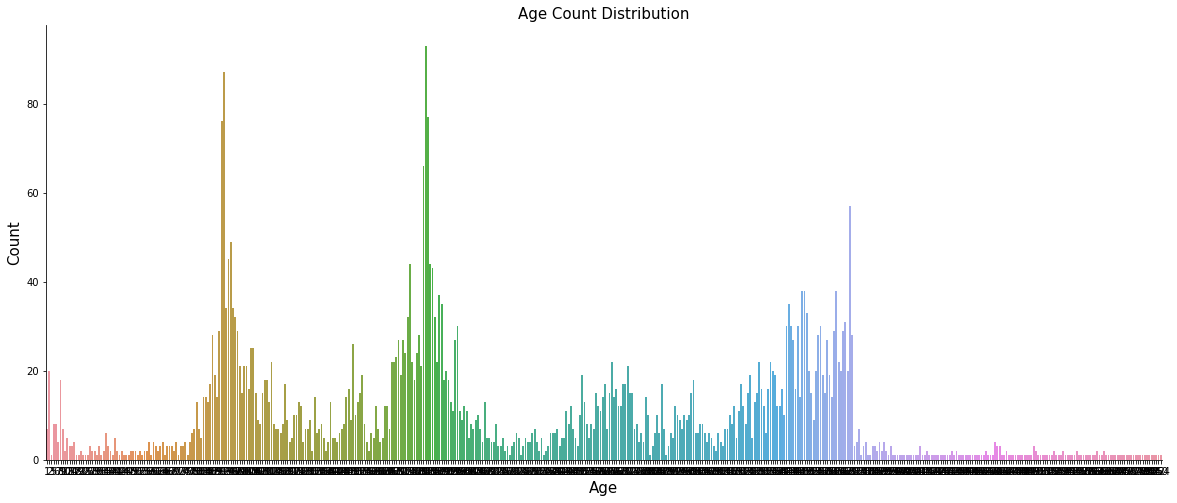

In [501]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'pdays', data = bank_data)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()
plt.show()

In [629]:
bank_data.groupby('job')['campaign'].count()

job
admin.           2909
blue-collar      5456
entrepreneur      856
housemaid         663
management       5296
retired          1273
self-employed     884
services         2342
student           533
technician       4241
unemployed        701
unknown           163
Name: campaign, dtype: int64

In [689]:
bank_data.loc[bank_data['balance']<0, ]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3,28,management,single,secondary,no,-994,yes,yes,cellular,18,jul,174,2,-1,0,unknown,0
7,33,management,single,tertiary,no,-359,no,no,telephone,29,aug,59,2,-1,0,unknown,0
23,25,blue-collar,married,secondary,no,-507,yes,yes,unknown,4,jun,404,2,-1,0,unknown,0
32,31,admin.,married,secondary,no,-106,yes,no,cellular,3,feb,258,4,-1,0,unknown,0
39,55,blue-collar,married,secondary,no,-157,no,no,cellular,6,feb,354,5,-1,0,unknown,0
58,54,technician,married,secondary,no,-939,yes,no,unknown,29,may,202,1,-1,0,unknown,0
60,21,blue-collar,married,primary,yes,-426,no,no,unknown,4,jun,139,2,-1,0,unknown,0
63,50,services,divorced,secondary,yes,-210,no,yes,cellular,21,aug,153,7,-1,0,unknown,0
65,43,blue-collar,married,primary,no,-67,yes,no,telephone,15,may,137,7,371,1,failure,0
82,36,management,married,tertiary,no,-825,no,no,unknown,27,may,95,1,-1,0,unknown,0


In [656]:
bank_data.drop[(bank_data['campaign']==20) & (bank_data['y'] == 1), ]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
23629,28,student,single,secondary,no,0,no,no,cellular,18,feb,209,20,-1,0,unknown,1


In [624]:
bank_data.loc[23629, ]

age                 28
job            student
marital         single
education    secondary
default             no
balance              0
housing             no
loan                no
contact       cellular
day                 18
month              feb
duration           209
campaign            20
pdays               -1
previous             0
poutcome       unknown
y                    1
Name: 23629, dtype: object

In [622]:
bank_data.loc[22968, ]

age                 46
job          housemaid
marital        married
education    secondary
default             no
balance            271
housing            yes
loan                no
contact       cellular
day                 30
month              jul
duration          1013
campaign            29
pdays               -1
previous             0
poutcome       unknown
y                    1
Name: 22968, dtype: object

In [184]:

print('第一四分位数: ', bank_data['duration'].quantile(q = 0.25))
print('第二四分位数: ', bank_data['duration'].quantile(q = 0.50))
print('第三四分位数: ', bank_data['duration'].quantile(q = 0.75))
print('第四四分位数: ', bank_data['duration'].quantile(q = 1.00))
print('duration > ', bank_data['duration'].quantile(q = 0.75) + 
                      1.5*(bank_data['duration'].quantile(q = 0.75) - bank_data['duration'].quantile(q = 0.25)), '属于异常值')


第一四分位数:  103.0
第二四分位数:  181.0
第三四分位数:  317.0
第四四分位数:  3881.0
duration >  638.0 属于异常值


In [180]:
def duration(data):
    data.loc[data['duration'] <= 103.0, 'duration'] = 1
    data.loc[(data['duration'] > 103.0) & (data['duration'] <= 181.0)  , 'duration']    = 2
    data.loc[(data['duration'] > 181.0) & (data['duration'] <= 317.0)  , 'duration']   = 3
    data.loc[(data['duration'] > 317.0) & (data['duration'] <= 638.0), 'duration'] = 4
    data.loc[data['duration']  > 638.0 , 'duration'] = 5
    return data
duration(bank_data)["duration"].value_counts()

2    5123
1    5072
3    5009
4    4183
5     866
Name: duration, dtype: int64

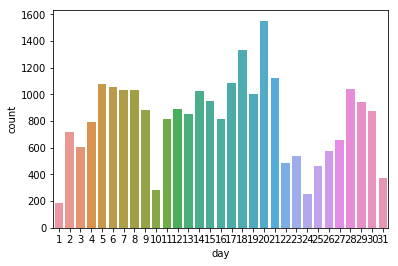

In [79]:

import seaborn as sns
sns.countplot(x = 'day', data = bank_data)
plt.show()


In [356]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

def create_data(strat_set):
    new_bank_data = strat_set.copy()

    
    bank_set=new_bank_data.iloc[:,new_bank_data.columns!='y']
    bank_set=new_bank_data
    bank_labels=new_bank_data.iloc[:,new_bank_data.columns=='y']

    #  因为 pdays 存在很多异常值， 我们这里去掉该特征
#     bank_set.drop(['pdays'],inplace=True,axis=1)
    # day 有很多不同值，而且跟月份有关，这里去掉
#     bank_set.drop(['day'],inplace=True,axis=1)
#     bank_set.drop(['previous'],inplace=True,axis=1)
#     bank_set.drop(['default'],inplace=True,axis=1)

#     bank_set.drop(['poutcome'],inplace=True,axis=1)
#     bank_set = duration(bank_set)
    bank_set = age(bank_set)
    
    # 填充缺失值
    bank_set.loc[bank_set['job']=='unknown', 'job'] = 'admin.'
    
    
    
#     secondary    12957
#     tertiary      7447
#     primary       3848
#     unknown       1065
    
    bank_set.loc[bank_set['education']=='unknown', 'job'] = 'secondary'
    
    cat_attribs = ['job', 'marital','education', 'housing', 'loan', 'contact', 'month', 'poutcome']
#     labelencoder_X = LabelEncoder()
#     for item in cat_attribs:
#         bank_set[item] = labelencoder_X.fit_transform(bank_set[item])
#         bank_set[item] = bank_set[item]
    
    
    
    
    one_hot = pd.get_dummies(bank_set['default']).rename(columns={'no': 'default_no',
                                                        'yes': 'default_yes',})
    one_hot.drop(['default_no'],inplace=True,axis=1)
    bank_set = pd.concat([bank_set, one_hot], axis=1)
    bank_set.drop(['default'],inplace=True,axis=1)
    
    
#     one_hot = pd.get_dummies(bank_set['poutcome']).rename(columns={'unknown': 'poutcome_unknown',})
#     one_hot.drop(['other'],inplace=True,axis=1)
#     one_hot.drop(['poutcome_unknown'],inplace=True,axis=1)
#     bank_set = pd.concat([bank_set, one_hot], axis=1)
#     bank_set.drop(['poutcome'],inplace=True,axis=1)
    
    for item in cat_attribs:
        column_list = set(bank_set[item])
        new_columns = {str(name): item + "_" + str(name)+"" for name in column_list}
        
        one_hot = pd.get_dummies(bank_set[item]).rename(columns=new_columns)
        bank_set = pd.concat([bank_set, one_hot], axis=1)
        
    for item in cat_attribs:
        bank_set.drop([item],inplace=True,axis=1)
    
    
#     bank_set['balance']=StandardScaler().fit_transform(bank_set[['balance']])
#     bank_set['previous']=StandardScaler().fit_transform(bank_set[['previous']])
#     bank_set['pdays']=StandardScaler().fit_transform(bank_set[['pdays']])
#     bank_set['campaign']=StandardScaler().fit_transform(bank_set[['campaign']])
#     bank_set['age']=StandardScaler().fit_transform(bank_set[['age']])
#     bank_set['duration']=StandardScaler().fit_transform(bank_set[['duration']])
    
#     bank_set.drop(['age'],inplace=True,axis=1)
#     bank_set.drop(['duration'],inplace=True,axis=1)
#     bank_set.drop(['campaign'],inplace=True,axis=1)

    return bank_set, bank_labels


bank_set1, bank_labels1 = create_data(strat_train_set)
bank_set1.head()


,age,balance,day,duration,campaign,pdays,previous,y,default_yes,job_admin.,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
1746,2,285,18,261,1,178,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1181,3,0,20,83,5,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18258,2,682,14,285,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6925,1,2597,15,233,1,368,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
23275,3,1044,11,585,1,192,2,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [236]:
# 查找关联
corr_matrix = bank_set1.corr()
corr_matrix["contact_unknown"].sort_values(ascending=False)

poutcome_success       1.000000
y                      0.313634
pdays                  0.229360
previous               0.163482
month_oct              0.131306
month_sep              0.127469
contact_cellular       0.103300
housing_no             0.093906
month_dec              0.075475
job_student            0.062003
job_retired            0.054198
loan_no                0.054154
education_tertiary     0.046328
duration               0.046174
month_mar              0.037364
month_feb              0.029778
balance                0.028791
marital_single         0.028130
month_jan              0.024851
age                    0.024302
job_unemployed         0.016361
job_secondary          0.015320
education_unknown      0.015320
contact_telephone      0.011852
job_management         0.011646
job_admin.             0.011212
month_apr              0.010036
job_self-employed      0.003917
month_nov             -0.000034
month_aug             -0.001127
marital_divorced      -0.002952
job_tech

In [437]:
# bank_set1["poutcome_unknown"].value_counts()
bank_set1.groupby('housing')['loan'].value_counts()

KeyError: 'housing'

In [336]:
bank_set1.groupby('pdays')['loan_no'].value_counts()

pdays  loan_no
-1     1          13793
       0           2760
 1     1              4
       0              1
 2     1             10
       0              4
 3     1              1
 5     1              6
 6     1              8
 7     0              2
       1              1
 8     1             10
       0              4
 9     1              5
       0              1
 10    1              2
 12    1              4
 13    1              3
 14    1              2
 17    1              3
 18    1              1
 19    1              1
 21    1              2
 22    1              1
 25    1              1
 26    1              1
 27    1              2
 28    0              1
       1              1
 30    1              1
                  ...  
 557   1              1
 558   1              1
 562   1              1
 579   1              1
 586   1              1
 589   1              1
 592   1              1
 648   1              1
 651   1              2
 655   1              1
 

In [339]:
bank_set1.groupby('pdays')['previous'].value_counts()

pdays  previous
-1     0           16553
 1     3               2
       1               1
       6               1
       7               1
 2     1               4
       2               4
       5               3
       3               2
       6               1
 3     6               1
 5     1               3
       2               3
 6     1               3
       3               3
       2               1
       6               1
 7     1               1
       5               1
       7               1
 8     1               6
       2               4
       3               2
       7               1
       10              1
 9     2               3
       1               1
       3               1
       7               1
 10    6               1
                   ...  
 558   7               1
 562   1               1
 579   1               1
 586   2               1
 589   4               1
 592   2               1
 648   1               1
 651   1               1
       7 

In [677]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler



from sklearn.ensemble import RandomForestClassifier



def create_data(strat_set):
    new_bank_data = strat_set.copy()
    bank_set=new_bank_data.iloc[:,new_bank_data.columns!='y']
    bank_labels=new_bank_data.iloc[:,new_bank_data.columns=='y']

    #  因为 pdays 存在很多异常值， 我们这里去掉该特征
#     bank_set.drop(['pdays'],inplace=True,axis=1)
    # day 有很多不同值，而且跟月份有关，这里去掉
#     bank_set.drop(['day'],inplace=True,axis=1)
#     bank_set.drop(['previous'],inplace=True,axis=1)
#     bank_set.drop(['default'],inplace=True,axis=1)

#     bank_set.drop(['poutcome'],inplace=True,axis=1)
#     bank_set = duration(bank_set)
    bank_set = age(bank_set)
    
#     print(bank_set['job'].value_counts())
#     labelencoder_X = LabelEncoder()
#     for item in ['job', "balance","duration","campaign","previous","loan","default","marital", "education"]:
#         bank_set[item] = labelencoder_X.fit_transform(bank_set[item])
#         bank_set[item] = bank_set[item] + 1
    
#     
    # 随机森林
#     dataWind0 =bank_set[bank_set["job"]==12]
#     dataWindNot0 = bank_set[bank_set["job"]!=12]
#     rfModel_wind = RandomForestClassifier()
#     windColumns = ["balance","loan","default","marital", "education"]
#     rfModel_wind.fit(dataWindNot0[windColumns], dataWindNot0["job"])

#     wind0Values = rfModel_wind.predict(X= dataWind0[windColumns])
#     dataWind0["job"] = wind0Values
#     bank_set = dataWindNot0.append(dataWind0)
    
    
    # 填充缺失值
#     bank_set.loc[bank_set['job']=='unknown', 'job'] = 'admin.'
    
#     bank_set['new_pdays'] = bank_set['pdays']
    bank_set.loc[(bank_set['pdays'] > -1) & (bank_set['pdays'] <= 400.0)  , 'pdays']    = 2
    bank_set.loc[(bank_set['pdays'] > 400.0), 'pdays']   = 3
    bank_set.loc[bank_set['pdays'] == -1, 'pdays'] = 1
#     
#     

#     bank_set["pdays_fialure"] = 
    
    
#     bank_set["loan_housing"] = bank_set["loan"] + bank_set["housing"]
#     bank_set["month_day"] = bank_set["month"] + bank_set["day"].astype('str')
    
#     labelencoder_X = LabelEncoder()
#     for item in ['loan_housing']:
#         bank_set[item] = labelencoder_X.fit_transform(bank_set[item])
#         bank_set[item] = bank_set[item] + 1
    
#     secondary    12957
#     tertiary      7447
#     primary       3848
#     unknown       1065
    
#     bank_set.loc[bank_set['education']=='unknown', 'education'] = 'secondary'
    
    

    bank_set["all_count"] = bank_set["campaign"] + bank_set["previous"]
    
    
    
    cat_attribs = ['job', 'marital','education', 'housing', 'loan', 'contact', 'poutcome', 'age', 'month', 'pdays']
    
    
    
#     labelencoder_X = LabelEncoder()
#     for item in ['month']:
#         bank_set[item] = labelencoder_X.fit_transform(bank_set[item])
#         bank_set[item] = bank_set[item] + 2
    
    
    
    
    one_hot = pd.get_dummies(bank_set['default']).rename(columns={'no': 'default_no',
                                                        'yes': 'default_yes',})
#     one_hot.drop(['default_no'],inplace=True,axis=1)
    bank_set = pd.concat([bank_set, one_hot], axis=1)
    bank_set.drop(['default'],inplace=True,axis=1)
    
    
#     one_hot = pd.get_dummies(bank_set['poutcome']).rename(columns={'unknown': 'poutcome_unknown',})
#     one_hot.drop(['other'],inplace=True,axis=1)
#     one_hot.drop(['poutcome_unknown'],inplace=True,axis=1)
#     bank_set = pd.concat([bank_set, one_hot], axis=1)
#     bank_set.drop(['poutcome'],inplace=True,axis=1)
    
    
    for item in cat_attribs:
        column_list = set(bank_set[item])
        new_columns = {name: item + "_" + str(name) for name in column_list}
#         print(new_columns)
        one_hot = pd.get_dummies(bank_set[item]).rename(columns=new_columns)
        bank_set = pd.concat([bank_set, one_hot], axis=1)
        
    for item in cat_attribs:
        bank_set.drop([item],inplace=True,axis=1)
    
    
    
#     bank_set['balance']=StandardScaler().fit_transform(bank_set[['balance']])
#     bank_set['previous']=StandardScaler().fit_transform(bank_set[['previous']])
#     bank_set['campaign']=StandardScaler().fit_transform(bank_set[['campaign']])
#     bank_set['duration']=StandardScaler().fit_transform(bank_set[['duration']])
    
#     bank_set.drop(['age'],inplace=True,axis=1)
#     bank_set.drop(['duration'],inplace=True,axis=1)
#     bank_set.drop(['campaign'],inplace=True,axis=1)

    bank_set.drop(['contact_unknown'],inplace=True,axis=1)
    
    
    bank_set.drop(['poutcome_unknown'],inplace=True,axis=1)
    bank_set.drop(['job_unknown'],inplace=True,axis=1)
    bank_set.drop(['education_unknown'],inplace=True,axis=1)
#     bank_set.drop(['poutcome_other'],inplace=True,axis=1)
    
    

    
    return bank_set, bank_labels

# bank_set, bank_labels = create_data(bank_data)
bank_set, bank_labels = create_data(strat_train_set)
bank_set.head()


,balance,day,duration,campaign,previous,all_count,default_no,default_yes,job_admin.,job_blue-collar,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,pdays_1,pdays_2,pdays_3
1746,285,18,261,1,1,2,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1181,0,20,83,5,0,5,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
18258,682,14,285,2,0,2,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
6925,2597,15,233,1,1,2,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
23275,1044,11,585,1,2,3,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [678]:
# 验证集
val_set, val_labels = create_data(strat_test_set)
val_set.head()


,balance,day,duration,campaign,previous,all_count,default_no,default_yes,job_admin.,job_blue-collar,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,pdays_1,pdays_2,pdays_3
2946,190,7,51,1,0,1,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0
17450,547,28,74,1,2,3,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
24220,2540,14,278,5,4,9,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
17663,831,23,84,13,0,13,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
12714,3322,20,380,1,4,5,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## 选择模型并训练

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
n_splits = 10
kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
gbm1=GradientBoostingClassifier(random_state=42)
gbm1.fit(bank_set,bank_labels)
LOGCV = (cross_val_score(gbm1, bank_set, bank_labels, cv=kfold, n_jobs=1, scoring = 'roc_auc'))
print(LOGCV)
LOGCV.mean()

[0.91388537 0.9223973  0.93314512 0.9230058  0.91084492 0.92854732
 0.92533321 0.93880441 0.91587022 0.92565668]


0.923749036565615

In [33]:
y_pred=gbm1.predict(val_set)
y_predprob=gbm1.predict_proba(val_set)[:,1]
print("AUC Score(Train data): %f" % roc_auc_score(val_labels,y_predprob))

AUC Score(Train data): 0.928088


In [679]:
# 测试集
test_data=pd.read_csv(os.path.join(BANK_PATH,'test_set.csv'))
result_pd = pd.DataFrame(data=test_data['ID'], columns=['ID'])
test_data.drop(['ID'],inplace=True,axis=1)
test_set, test_labels = create_data(test_data)
test_set.head()

,balance,day,duration,campaign,previous,all_count,default_no,default_yes,job_admin.,job_blue-collar,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,pdays_1,pdays_2,pdays_3
0,174,29,308,3,0,3,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,6059,20,110,2,0,2,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0,30,130,3,0,3,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,64,30,598,4,5,9,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,15,368,4,0,4,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [686]:
import lightgbm as lgb
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold, StratifiedKFold
n_splits = 10
kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
clf = lgb.LGBMClassifier(
        boosting_type="gbdt", num_leaves=40, reg_alpha=0, reg_lambda=0.,
    max_depth=-1, n_estimators=1500, objective='binary',metric= 'auc',
    subsample=0.95, colsample_bytree=0.8, subsample_freq=1,
    learning_rate=0.05, random_state=42
    )
train_x = np.array(bank_set)
train_y = np.array(bank_labels)

result_pd['pred'] = 0

result = []
for train_idx, val_idx in kfold.split(train_x, train_y):
    clf.random_state = clf.random_state + 1
    
    train_x1 = bank_set.iloc[train_idx]
    train_y1 = bank_labels.iloc[train_idx]
    
    test_x1 = bank_set.iloc[val_idx]
    test_y1 = bank_labels.iloc[val_idx]
    
    clf.fit(train_x1, train_y1,eval_set=[(train_x1, train_y1),(test_x1, test_y1)],eval_metric='auc',early_stopping_rounds=20,
           )
    # categorical_feature=['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'age']
    result_pd['pred'] += clf.predict_proba(test_set)[:,1]
    
    
#     y_pred=clf.predict(val_set)
#     y_predprob=clf.predict_proba(val_set)[:,1]
#     print("AUC Score(Train data): %f" % roc_auc_score(val_labels,y_predprob))
    
#     result.append()

    

y_pred=clf.predict(val_set)
y_predprob=clf.predict_proba(val_set)[:,1]
print("AUC Score(Train data): %f" % roc_auc_score(val_labels,y_predprob))
# 保存
result_pd['pred'] = result_pd['pred']/n_splits
result_pd.to_csv('submit_result.csv', index=False)


[1]	training's auc: 0.892618	valid_1's auc: 0.867735
Training until validation scores don't improve for 20 rounds.
[2]	training's auc: 0.907551	valid_1's auc: 0.872559
[3]	training's auc: 0.918131	valid_1's auc: 0.895551
[4]	training's auc: 0.92247	valid_1's auc: 0.902804
[5]	training's auc: 0.923183	valid_1's auc: 0.904639
[6]	training's auc: 0.925526	valid_1's auc: 0.90695
[7]	training's auc: 0.926337	valid_1's auc: 0.90829
[8]	training's auc: 0.929224	valid_1's auc: 0.90946
[9]	training's auc: 0.929632	valid_1's auc: 0.908741
[10]	training's auc: 0.930083	valid_1's auc: 0.909142
[11]	training's auc: 0.930612	valid_1's auc: 0.909737
[12]	training's auc: 0.931359	valid_1's auc: 0.910075
[13]	training's auc: 0.93194	valid_1's auc: 0.910495
[14]	training's auc: 0.932777	valid_1's auc: 0.911138
[15]	training's auc: 0.934074	valid_1's auc: 0.912173
[16]	training's auc: 0.934454	valid_1's auc: 0.912002
[17]	training's auc: 0.93465	valid_1's auc: 0.911925
[18]	training's auc: 0.934797	valid

[1]	training's auc: 0.771175	valid_1's auc: 0.75609
Training until validation scores don't improve for 20 rounds.
[2]	training's auc: 0.9117	valid_1's auc: 0.895045
[3]	training's auc: 0.917815	valid_1's auc: 0.9038
[4]	training's auc: 0.918249	valid_1's auc: 0.903096
[5]	training's auc: 0.923331	valid_1's auc: 0.90623
[6]	training's auc: 0.92586	valid_1's auc: 0.908073
[7]	training's auc: 0.926432	valid_1's auc: 0.909607
[8]	training's auc: 0.928032	valid_1's auc: 0.910701
[9]	training's auc: 0.928573	valid_1's auc: 0.911033
[10]	training's auc: 0.929826	valid_1's auc: 0.914336
[11]	training's auc: 0.930156	valid_1's auc: 0.915699
[12]	training's auc: 0.932225	valid_1's auc: 0.917401
[13]	training's auc: 0.934017	valid_1's auc: 0.918512
[14]	training's auc: 0.934391	valid_1's auc: 0.918022
[15]	training's auc: 0.935385	valid_1's auc: 0.918988
[16]	training's auc: 0.936865	valid_1's auc: 0.920486
[17]	training's auc: 0.937059	valid_1's auc: 0.920376
[18]	training's auc: 0.93745	valid_1

[1]	training's auc: 0.898082	valid_1's auc: 0.886738
Training until validation scores don't improve for 20 rounds.
[2]	training's auc: 0.907996	valid_1's auc: 0.902037
[3]	training's auc: 0.915192	valid_1's auc: 0.909852
[4]	training's auc: 0.916961	valid_1's auc: 0.909622
[5]	training's auc: 0.916829	valid_1's auc: 0.908725
[6]	training's auc: 0.919575	valid_1's auc: 0.911144
[7]	training's auc: 0.923669	valid_1's auc: 0.91645
[8]	training's auc: 0.925464	valid_1's auc: 0.919166
[9]	training's auc: 0.928864	valid_1's auc: 0.921943
[10]	training's auc: 0.929445	valid_1's auc: 0.92219
[11]	training's auc: 0.930499	valid_1's auc: 0.923533
[12]	training's auc: 0.930925	valid_1's auc: 0.924285
[13]	training's auc: 0.931469	valid_1's auc: 0.924059
[14]	training's auc: 0.933517	valid_1's auc: 0.927216
[15]	training's auc: 0.933352	valid_1's auc: 0.92695
[16]	training's auc: 0.934327	valid_1's auc: 0.927071
[17]	training's auc: 0.934884	valid_1's auc: 0.926972
[18]	training's auc: 0.935595	va

[31]	training's auc: 0.941461	valid_1's auc: 0.924127
[32]	training's auc: 0.941782	valid_1's auc: 0.92412
[33]	training's auc: 0.942518	valid_1's auc: 0.924448
[34]	training's auc: 0.943425	valid_1's auc: 0.924877
[35]	training's auc: 0.943682	valid_1's auc: 0.92485
[36]	training's auc: 0.943906	valid_1's auc: 0.924807
[37]	training's auc: 0.944537	valid_1's auc: 0.925257
[38]	training's auc: 0.945255	valid_1's auc: 0.925512
[39]	training's auc: 0.945652	valid_1's auc: 0.925565
[40]	training's auc: 0.946168	valid_1's auc: 0.925991
[41]	training's auc: 0.946358	valid_1's auc: 0.926144
[42]	training's auc: 0.94688	valid_1's auc: 0.926512
[43]	training's auc: 0.947463	valid_1's auc: 0.927156
[44]	training's auc: 0.947902	valid_1's auc: 0.927281
[45]	training's auc: 0.948272	valid_1's auc: 0.927505
[46]	training's auc: 0.948862	valid_1's auc: 0.927699
[47]	training's auc: 0.949258	valid_1's auc: 0.927959
[48]	training's auc: 0.949632	valid_1's auc: 0.928039
[49]	training's auc: 0.949934	v

[85]	training's auc: 0.961723	valid_1's auc: 0.923234
[86]	training's auc: 0.961998	valid_1's auc: 0.923236
[87]	training's auc: 0.962196	valid_1's auc: 0.923298
[88]	training's auc: 0.962448	valid_1's auc: 0.923496
[89]	training's auc: 0.962632	valid_1's auc: 0.923506
[90]	training's auc: 0.962836	valid_1's auc: 0.923642
[91]	training's auc: 0.963047	valid_1's auc: 0.92359
[92]	training's auc: 0.963354	valid_1's auc: 0.923517
[93]	training's auc: 0.963563	valid_1's auc: 0.923336
[94]	training's auc: 0.963726	valid_1's auc: 0.923572
[95]	training's auc: 0.963895	valid_1's auc: 0.923524
[96]	training's auc: 0.964062	valid_1's auc: 0.923786
[97]	training's auc: 0.96424	valid_1's auc: 0.923864
[98]	training's auc: 0.964519	valid_1's auc: 0.923928
[99]	training's auc: 0.964858	valid_1's auc: 0.924334
[100]	training's auc: 0.965079	valid_1's auc: 0.924209
[101]	training's auc: 0.965284	valid_1's auc: 0.924079
[102]	training's auc: 0.965526	valid_1's auc: 0.92415
[103]	training's auc: 0.9657

[1]	training's auc: 0.88999	valid_1's auc: 0.881002
Training until validation scores don't improve for 20 rounds.
[2]	training's auc: 0.914618	valid_1's auc: 0.898694
[3]	training's auc: 0.91685	valid_1's auc: 0.901347
[4]	training's auc: 0.918023	valid_1's auc: 0.901604
[5]	training's auc: 0.918479	valid_1's auc: 0.900517
[6]	training's auc: 0.923118	valid_1's auc: 0.903993
[7]	training's auc: 0.92494	valid_1's auc: 0.90932
[8]	training's auc: 0.926388	valid_1's auc: 0.910802
[9]	training's auc: 0.928695	valid_1's auc: 0.909451
[10]	training's auc: 0.929837	valid_1's auc: 0.909886
[11]	training's auc: 0.930605	valid_1's auc: 0.910966
[12]	training's auc: 0.930812	valid_1's auc: 0.910767
[13]	training's auc: 0.931925	valid_1's auc: 0.911299
[14]	training's auc: 0.931814	valid_1's auc: 0.910786
[15]	training's auc: 0.931933	valid_1's auc: 0.91164
[16]	training's auc: 0.934794	valid_1's auc: 0.914341
[17]	training's auc: 0.936716	valid_1's auc: 0.915733
[18]	training's auc: 0.93848	valid

[52]	training's auc: 0.950201	valid_1's auc: 0.942758
[53]	training's auc: 0.950457	valid_1's auc: 0.942689
[54]	training's auc: 0.950992	valid_1's auc: 0.942929
[55]	training's auc: 0.951303	valid_1's auc: 0.942771
[56]	training's auc: 0.951679	valid_1's auc: 0.942679
[57]	training's auc: 0.952047	valid_1's auc: 0.942719
[58]	training's auc: 0.952372	valid_1's auc: 0.943043
[59]	training's auc: 0.952628	valid_1's auc: 0.942885
[60]	training's auc: 0.952819	valid_1's auc: 0.942913
[61]	training's auc: 0.953062	valid_1's auc: 0.943076
[62]	training's auc: 0.953353	valid_1's auc: 0.942986
[63]	training's auc: 0.953776	valid_1's auc: 0.943005
[64]	training's auc: 0.954053	valid_1's auc: 0.942981
[65]	training's auc: 0.954314	valid_1's auc: 0.943184
[66]	training's auc: 0.954615	valid_1's auc: 0.943536
[67]	training's auc: 0.954933	valid_1's auc: 0.943567
[68]	training's auc: 0.95522	valid_1's auc: 0.943456
[69]	training's auc: 0.955558	valid_1's auc: 0.943399
[70]	training's auc: 0.955848

[118]	training's auc: 0.968004	valid_1's auc: 0.929183
[119]	training's auc: 0.968198	valid_1's auc: 0.929334
[120]	training's auc: 0.968362	valid_1's auc: 0.929254
[121]	training's auc: 0.968634	valid_1's auc: 0.929216
[122]	training's auc: 0.968846	valid_1's auc: 0.929205
[123]	training's auc: 0.968992	valid_1's auc: 0.929094
[124]	training's auc: 0.969197	valid_1's auc: 0.929094
[125]	training's auc: 0.969395	valid_1's auc: 0.929046
[126]	training's auc: 0.969611	valid_1's auc: 0.929063
[127]	training's auc: 0.969764	valid_1's auc: 0.929138
[128]	training's auc: 0.969962	valid_1's auc: 0.9292
[129]	training's auc: 0.970125	valid_1's auc: 0.929131
[130]	training's auc: 0.970278	valid_1's auc: 0.929141
[131]	training's auc: 0.97046	valid_1's auc: 0.929082
[132]	training's auc: 0.970591	valid_1's auc: 0.928926
[133]	training's auc: 0.970788	valid_1's auc: 0.929032
[134]	training's auc: 0.970931	valid_1's auc: 0.92898
[135]	training's auc: 0.971101	valid_1's auc: 0.928846
[136]	training

[143]	training's auc: 0.97288	valid_1's auc: 0.932457
Early stopping, best iteration is:
[123]	training's auc: 0.96933	valid_1's auc: 0.932767
AUC Score(Train data): 0.935930


In [379]:
from sklearn.feature_selection import RFE
rfe = RFE(clf, n_features_to_select=1)
rfe.fit(train_x,train_y)

RFE(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.8,
        importance_type='split', learning_rate=0.04, max_depth=-1,
        metric='auc', min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=1500, n_jobs=-1, num_leaves=30,
        objective='binary', random_state=62, reg_alpha=0, reg_lambda=0.0,
        silent=True, subsample=0.95, subsample_for_bin=200000,
        subsample_freq=1),
  n_features_to_select=1, step=1, verbose=0)

In [604]:
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), bank_set.columns)))

[(1, 'duration'), (2, 'balance'), (3, 'day'), (4, 'previous'), (5, 'campaign'), (6, 'month_may'), (7, 'marital_divorced'), (8, 'education_primary'), (9, 'education_tertiary'), (10, 'all_count'), (11, 'loan_yes'), (12, 'month_mar'), (13, 'education_secondary'), (14, 'month_apr'), (15, 'job_housemaid'), (16, 'marital_married'), (17, 'job_admin.'), (18, 'month_nov'), (19, 'job_student'), (20, 'poutcome_failure'), (21, 'age_2'), (22, 'age_3'), (23, 'housing_yes'), (24, 'housing_no'), (25, 'default_yes'), (26, 'month_aug'), (27, 'job_unemployed'), (28, 'month_jan'), (29, 'job_self-employed'), (30, 'contact_telephone'), (31, 'marital_single'), (32, 'contact_cellular'), (33, 'poutcome_success'), (34, 'loan_no'), (35, 'age_1'), (36, 'month_jun'), (37, 'job_management'), (38, 'job_technician'), (39, 'month_dec'), (40, 'job_entrepreneur'), (41, 'job_retired'), (42, 'month_jul'), (43, 'age_4'), (44, 'job_services'), (45, 'default_no'), (46, 'month_feb'), (47, 'job_blue-collar'), (48, 'poutcome_ot

In [605]:
feature_importances = clf.feature_importances_
sorted(zip(feature_importances, val_set.columns), reverse=True)

[(721, 'duration'),
 (681, 'balance'),
 (586, 'day'),
 (186, 'campaign'),
 (154, 'previous'),
 (145, 'all_count'),
 (133, 'contact_cellular'),
 (119, 'month_may'),
 (110, 'housing_no'),
 (92, 'month_mar'),
 (85, 'month_apr'),
 (83, 'month_jul'),
 (82, 'month_aug'),
 (81, 'month_jun'),
 (81, 'month_feb'),
 (76, 'month_oct'),
 (73, 'poutcome_success'),
 (67, 'month_nov'),
 (65, 'month_sep'),
 (64, 'marital_married'),
 (64, 'loan_no'),
 (57, 'age_2'),
 (54, 'contact_telephone'),
 (53, 'month_jan'),
 (53, 'job_blue-collar'),
 (51, 'age_1'),
 (50, 'housing_yes'),
 (48, 'poutcome_failure'),
 (47, 'education_primary'),
 (45, 'education_tertiary'),
 (38, 'marital_single'),
 (38, 'education_secondary'),
 (34, 'job_technician'),
 (33, 'pdays_1'),
 (32, 'job_admin.'),
 (30, 'pdays_3'),
 (29, 'age_3'),
 (25, 'pdays_2'),
 (24, 'age_4'),
 (23, 'marital_divorced'),
 (23, 'job_retired'),
 (23, 'job_management'),
 (22, 'loan_yes'),
 (21, 'month_dec'),
 (21, 'job_student'),
 (19, 'poutcome_other'),
 (18

In [370]:

import lightgbm as lgb
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold, StratifiedKFold
n_splits = 5
kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
clf = lgb.LGBMClassifier(
        boosting_type="gbdt", num_leaves=30, reg_alpha=0, reg_lambda=0.,
    max_depth=-1, n_estimators=150, objective='binary',metric= 'auc',
    colsample_bytree=0.8, subsample_freq=1,
    random_state=42, # scale_pos_weight=8,learning_rate=0.04,subsample=0.95, early_stopping_rounds=10,
    )
train_x = np.array(bank_set)
train_y = np.array(bank_labels)

param_grid = dict(learning_rate=[0.01,0.04, 0.1, 0.2],
                  subsample=[0.8, 0.85, 0.9, 0.95],
                  scale_pos_weight=[1,8],
                 colsample_bytree=[0.6, 0.8, 0.9],)

# result_pd['pred'] = 0
# for train_idx, val_idx in kfold.split(train_x, train_y):
#     clf.random_state = clf.random_state + 1
#     train_x1 = bank_set.iloc[train_idx]
#     train_y1 = bank_labels.iloc[train_idx]
#     test_x1 = bank_set.iloc[val_idx]
#     test_y1 = bank_labels.iloc[val_idx]
#     clf.fit(train_x1, train_y1,eval_set=[(train_x1, train_y1),(test_x1, test_y1)],eval_metric='auc',b=10,
#            )

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
grid_search=GridSearchCV(clf, param_grid,scoring="roc_auc",cv=kfold)
grid_result=grid_search.fit(train_x,train_y)






In [373]:
final_model = grid_search.best_estimator_

y_predprob=final_model.predict_proba(np.array(val_set))[:,1]
print("AUC Score(Train data): %f" % roc_auc_score(np.array(val_labels),y_predprob))

# y_pred=clf.predict(val_set)
# y_predprob=clf.predict_proba(val_set)[:,1]
# print("AUC Score(Train data): %f" % roc_auc_score(val_labels,y_predprob))

grid_search.best_params_

AUC Score(Train data): 0.937887


{'colsample_bytree': 0.8,
 'learning_rate': 0.04,
 'scale_pos_weight': 1,
 'subsample': 0.95}

In [16]:
# xgboost
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

train_x = np.array(bank_set)
train_y = np.array(bank_labels)

model = xgb.XGBClassifier()
learning_rate = [0.01,0.1]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
grid_search=GridSearchCV(model, param_grid,scoring="roc_auc",n_jobs=-1,cv=kfold)
grid_result=grid_search.fit(train_x,train_y)

In [17]:
grid_result

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
       error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'learning_rate': [0.01, 0.1]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='roc_auc', verbose=0)

In [21]:
final_model = grid_search.best_estimator_

y_predprob=final_model.predict_proba(np.array(val_set))[:,1]
print("AUC Score(Train data): %f" % roc_auc_score(np.array(val_labels),y_predprob))


AUC Score(Train data): 0.928575
